In [3]:
#!pip install statsmodels
#!pip install catboost
#!pip install imblearn
#!pip install xgboost

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import os
import phik
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder,MaxAbsScaler,RobustScaler
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from math import ceil
from numpy.random import RandomState
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [6]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()

In [7]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()

In [8]:
def heatmap_phik(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Phik Correlation Matrix')
    plt.show()
    

In [9]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [10]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [11]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

In [12]:
def micro_f1_score(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the micro f1 score of the train and validation dataset
    """
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_train, pred_train, average='micro'))

    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_val, pred_val, average='micro'))
    return f1_score(y_val, pred_val, average='micro')

In [13]:
def best_scale(model,X_train,y_train,X_test,y_test):
    """
    Function that returns a table with the micro f1 score for the different scaler
    """
    standard=StandardScaler().fit(X_train).transform(X_train)
    standardTest=StandardScaler().fit(X_test).transform(X_test)

    minMax=MinMaxScaler().fit(X_train).transform(X_train)
    minMaxTest=MinMaxScaler().fit(X_test).transform(X_test)

    maxAbs=MaxAbsScaler().fit(X_train).transform(X_train)
    maxAbsTest=MaxAbsScaler().fit(X_test).transform(X_test)
        
    robust=RobustScaler().fit(X_train).transform(X_train)
    robustTest=RobustScaler().fit(X_test).transform(X_test)

    sclares=[standard,minMax,maxAbs,robust,X_train]
    sclaresTest=[standardTest,minMaxTest,maxAbsTest,robustTest,X_test]
    
    f_score=[]
    
    for i in range(len(sclares)):
        model.fit(sclares[i],y_train)
        y_pred=model.predict(sclaresTest[i])
        f_score.append(f1_score(y_pred,y_test,average="micro"))
        

    return pd.DataFrame(f_score,index=["Standard","MinMax","MaxAbs","Robust","No Scaler"], columns=["F1 Score"])
    

In [14]:
def roc_curve_plot(model,X_train,X_test,y_test,y_train):
    """
    Function that plots the roc curve for a given model
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr_train, tpr_train,label="ROC Curve train")
    plt.plot(fpr_test, tpr_test,label="ROC Curve test")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

In [15]:
original = pd.read_csv("H2.csv")
original.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

       Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0         NULL                 0    Transient   0.0                         0   
1         NULL                 0    Transient  76.5                         0   
2         NULL                 0    Transient  68.0                         0   
3         NULL                 0    Transient  76.5                         0   
4         NULL                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [16]:
df=original.copy()

In [17]:
df.shape

(79330, 31)

In [18]:
df.replace('       NULL','Individual', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [20]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [21]:
df.isna().sum()/len(df)*100

IsCanceled                     0.000000
LeadTime                       0.000000
ArrivalDateYear                0.000000
ArrivalDateMonth               0.000000
ArrivalDateWeekNumber          0.000000
ArrivalDateDayOfMonth          0.000000
StaysInWeekendNights           0.000000
StaysInWeekNights              0.000000
Adults                         0.000000
Children                       0.005042
Babies                         0.000000
Meal                           0.000000
Country                        0.030253
MarketSegment                  0.000000
DistributionChannel            0.000000
IsRepeatedGuest                0.000000
PreviousCancellations          0.000000
PreviousBookingsNotCanceled    0.000000
ReservedRoomType               0.000000
AssignedRoomType               0.000000
BookingChanges                 0.000000
DepositType                    0.000000
Agent                          0.000000
Company                        0.000000
DaysInWaitingList              0.000000


In [23]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  2       1       0.0  ...  No Deposit                 6   
1                  4       2       0.0  ...  No Deposit                 9   
2                  4       1       0.0  ...  No Deposit                 9   
3                  4       2       0.0  ...  No Deposit                 9   
4                  2       2       0.0  ...  No Deposit                 9   

      Company DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0  Individual                 0    Transient   0.0                         0   
1  Individual                 0    Transient  76.5                         0   
2  Individual                 0    Transient  68.0                         0   
3  Individual                 0    Transient  76.5                         0   
4  Individual                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

In [24]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [25]:
#Tem demasiadas variaveis categoricas
df.drop(['ReservationStatusDate','DepositType'],axis=1,inplace=True)

In [26]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus'],
      dtype='object')

In [27]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

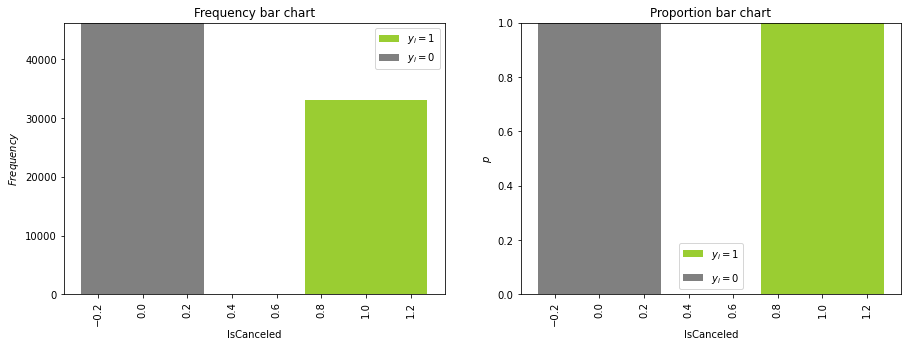

In [28]:
bar_charts_categorical(df,"IsCanceled", 'IsCanceled')

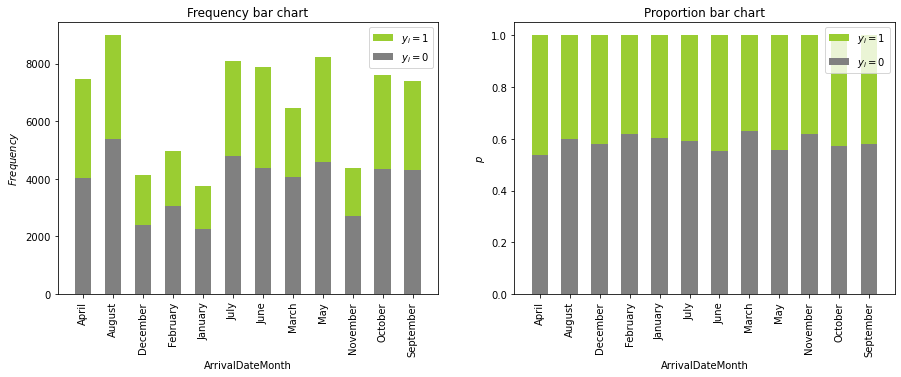

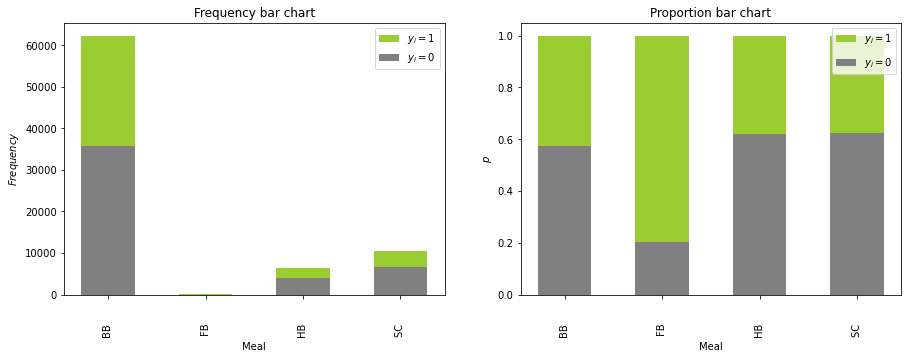

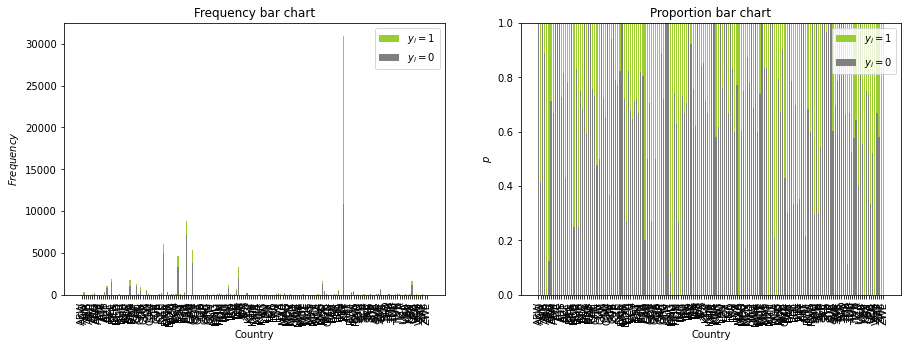

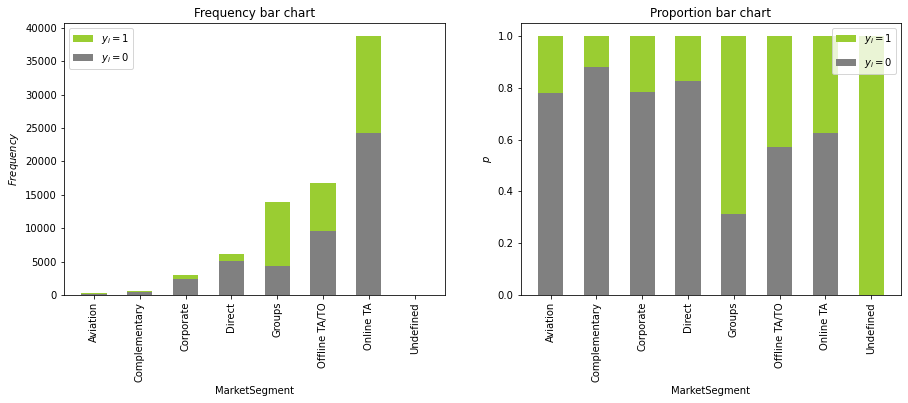

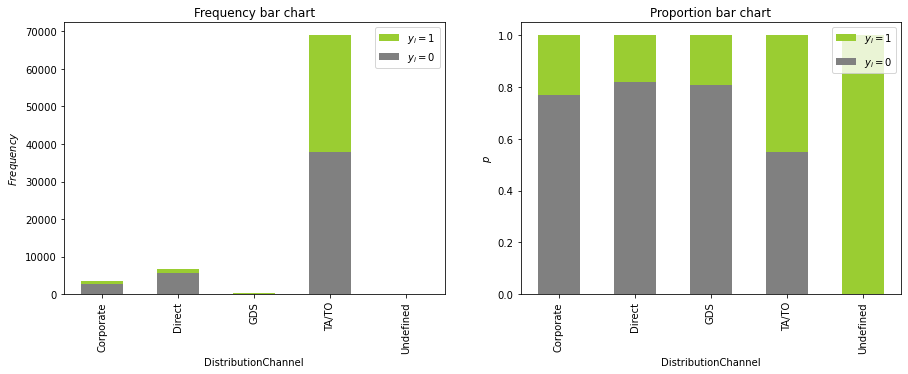

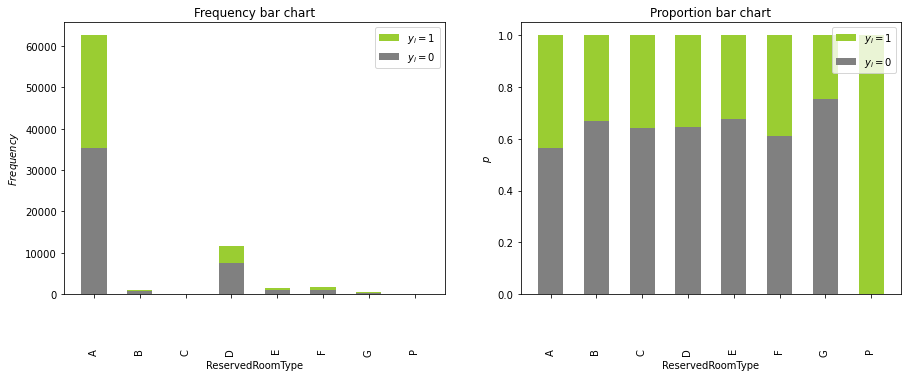

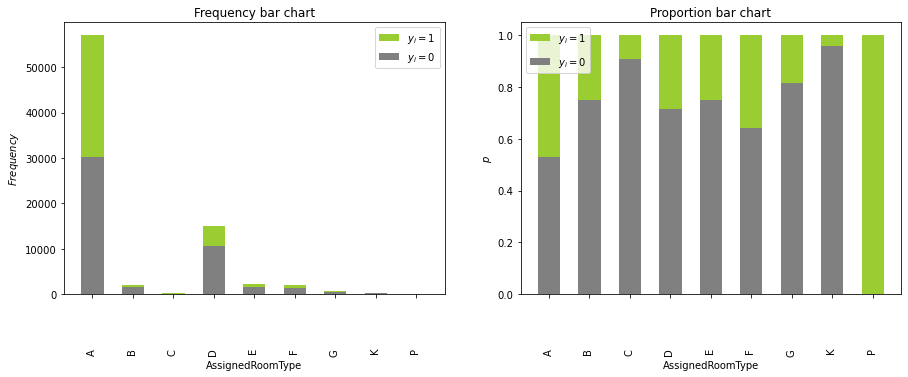

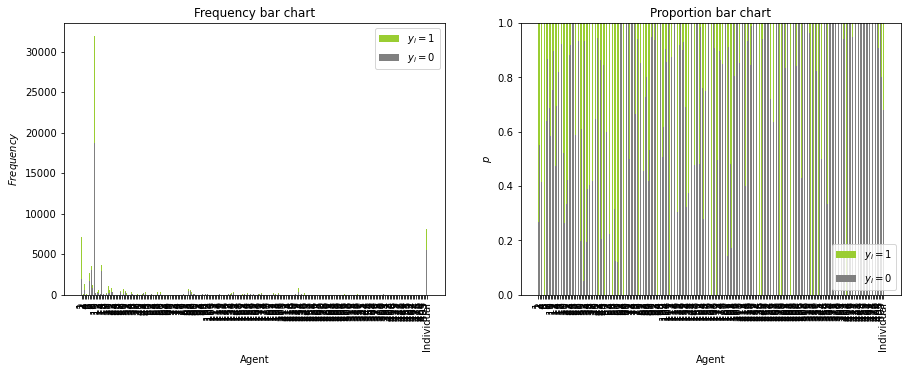

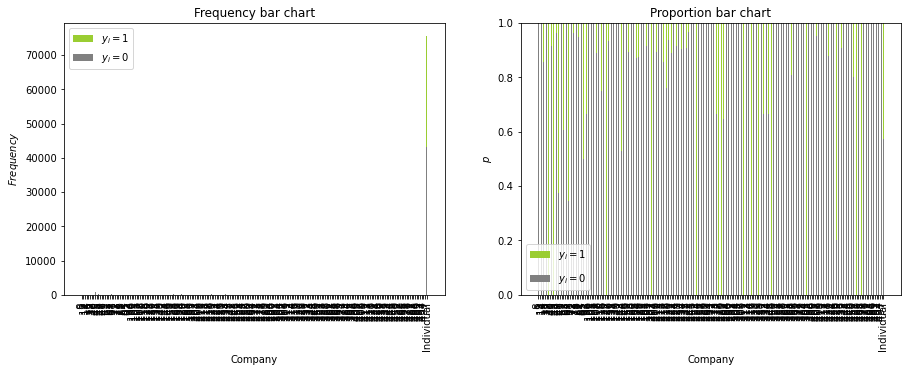

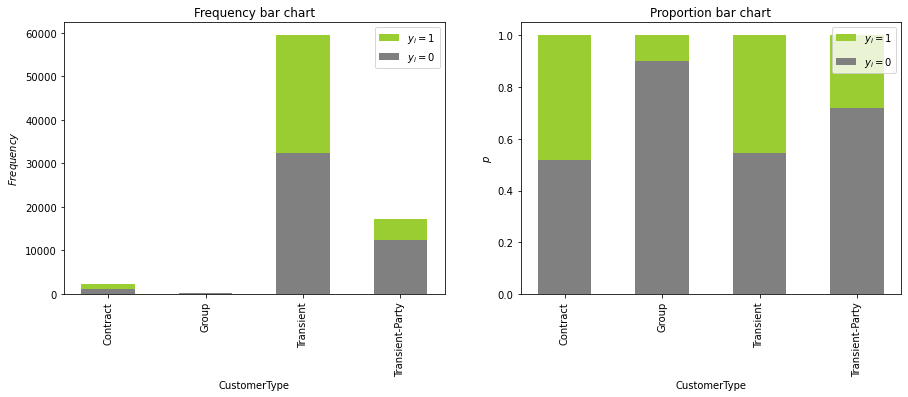

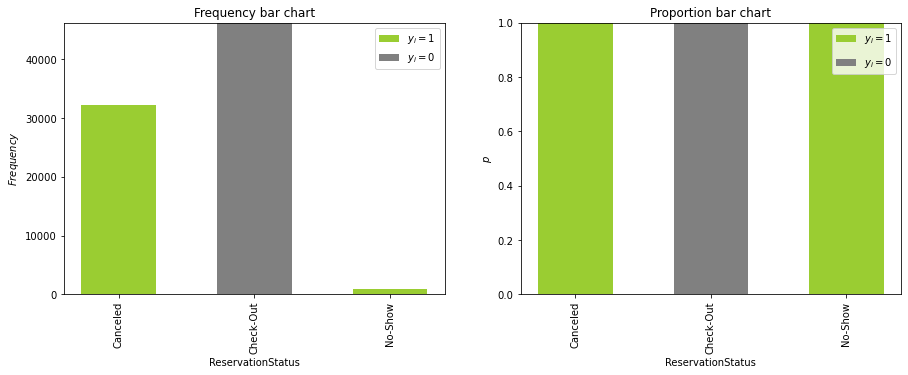

In [29]:
for i in categorical:   
    bar_charts_categorical(df, i, "IsCanceled")

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font> <a class="anchor" id="sixth-bullet"></a>
    
</div>

### Cancelation ratio per year

In [50]:
year_df=df.loc[:,['ArrivalDateYear','IsCanceled']]

In [133]:
df_year = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().reset_index()
df_year['percentage'] = df.groupby(['ArrivalDateYear', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year.columns = ['ArrivalDateYear', 'IsCanceled', 'Counts', 'Percentage']
year_fig = px.bar(df_year, x='ArrivalDateYear', y=['Counts'], color='IsCanceled', text=df_year['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [84]:
year_fig.update_traces(marker_color=['grey','darkred']*3)
year_fig.show()

### Cancelation Ratio % by Month and Year

In [167]:
df["Arrival Year and Month"] = df.ArrivalDateYear.astype(str) + " " + df.ArrivalDateMonth.astype(str)

In [168]:
ordered_months = ["2015 July", "2015 August", "2015 September", "2015 October", "2015 November", "2015 December"
        ,"2016 January", "2016 February", "2016 March", "2016 April", "2016 May", "2016 June", 
          "2016 July", "2016 August", "2016 September", "2016 October", "2016 November", "2016 December",
            "2017 January", "2017 February", "2017 March", "2017 April", "2017 May", "2017 June", 
          "2017 July", "2017 August"]
df["Arrival Year and Month"]= pd.Categorical(df["Arrival Year and Month"], categories=ordered_months, ordered=True)

In [169]:
df_year_month = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().reset_index()
df_year_month['Percentage'] = df.groupby(['Arrival Year and Month', 'IsCanceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_year_month.columns = ['Arrival Year and Month', 'IsCanceled', 'Counts', 'Percentage']
year_month_fig = px.bar(df_year_month, x='Arrival Year and Month', y=['Counts'], color='IsCanceled', text=df_year_month['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [170]:
year_month_fig.update_traces(marker_color=['grey','darkred']*26)
year_month_fig.show()

### Home  Country of Guests

In [172]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'Arrival year and month',
       'Arrival Year and Month'],
      dtype='object')

In [183]:
country_df = pd.DataFrame(df.loc[df["IsCanceled"] == 0]["Country"].value_counts())
country_df.rename(columns={"Country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["Country"] = country_data.index
country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
country_fig = px.pie(country_data,
             values="Number of Guests",
             names="Country",
             title="Home country of guests",
             template="seaborn")

country_fig.update_traces(textposition="inside", textinfo="value+percent+label")
country_fig.show()

### Lead Time vs ADR by Booking Status

In [187]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'Arrival year and month',
       'Arrival Year and Month'],
      dtype='object')

In [190]:
x = df['LeadTime']
y = df['ADR']
color = df['IsCanceled']

data = dict(type='scatter',
            x=x, 
            y=y,  
            mode='markers',
            marker=dict(
                        color=color,
                        colorbar=dict(title=dict(text='Canceled')),
                        colorscale='Viridis',
                        showscale=True,
                        line=dict(
                                  color='black',
                                  colorscale='inferno' #Not in use here since our line color is fixed!
                                )
                       ),
            hovertemplate="LeadTime: <b>%{x}</b> <br><br>" + 
                        "ADR: %{y} <br>" +
                        "Canceled: %{color} <br>" 
                       
            
            ,
            name='Scatter Visualization',
            showlegend=False
           )



layout = dict(title=dict(text='Lead Time vs ADR by Booking Status'),
              yaxis=dict(title='ADR'),
              xaxis=dict(title='LeadTime')
             )


fig_lead_adr = go.Figure(data=data, layout=layout)

fig_lead_adr.show()

### Lead Time By Cancelations 

In [191]:
x = df['LeadTime']
y = df['IsCanceled']

data = dict(type='scatter',
            x=x, 
            y=y,  
            mode='markers',
            marker=dict(
                        
                        showscale=False,
                        
                       ),
            hovertemplate="LeadTime: <b>%{x}</b> <br><br>" + 
                        "Canceled: %{y} <br>" 
                       
            
            ,
            name='Scatter Visualization',
            showlegend=False
           )



layout = dict(title=dict(text='Lead Time by Cancelations'),
              yaxis=dict(title='ADR'),
              xaxis=dict(title='LeadTime')
             )


fig_lead_adr = go.Figure(data=data, layout=layout)

fig_lead_adr.show()

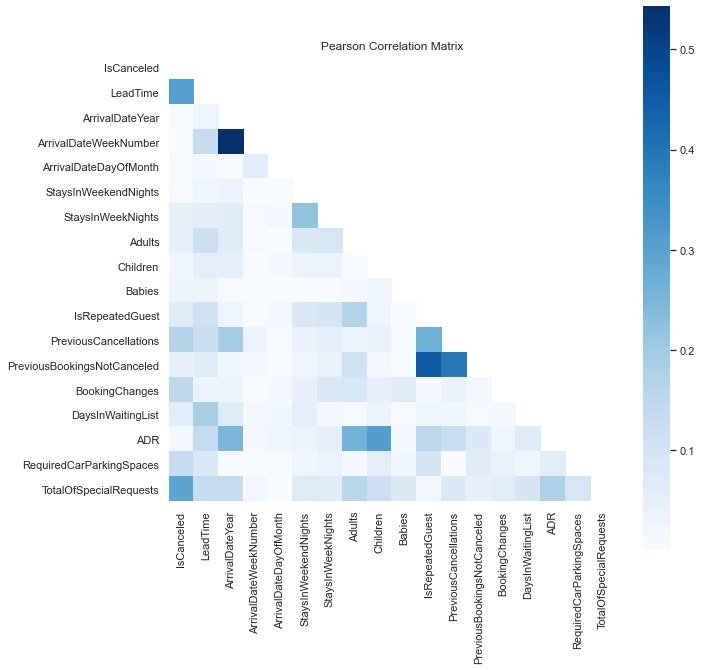

In [41]:
heatmap_pearson(df.corr(method='pearson').abs())

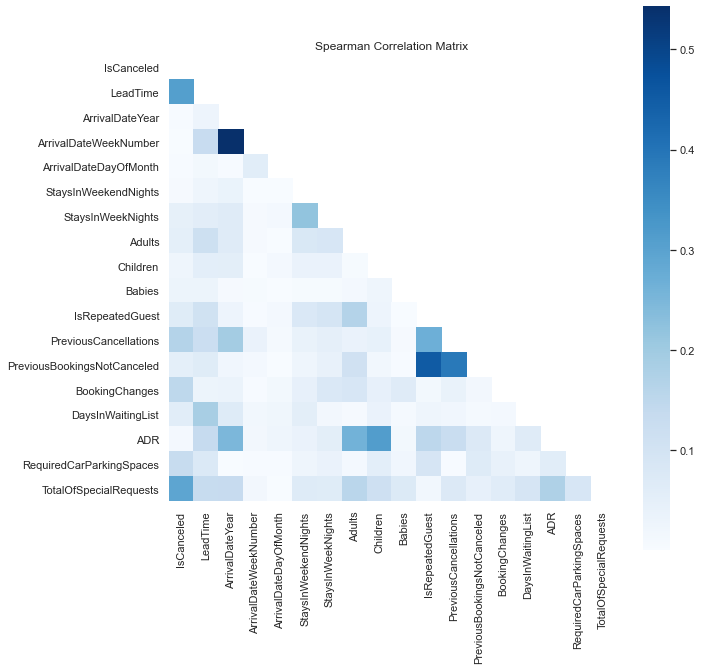

In [42]:
heatmap_spearman(df.corr(method='pearson').abs())

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']


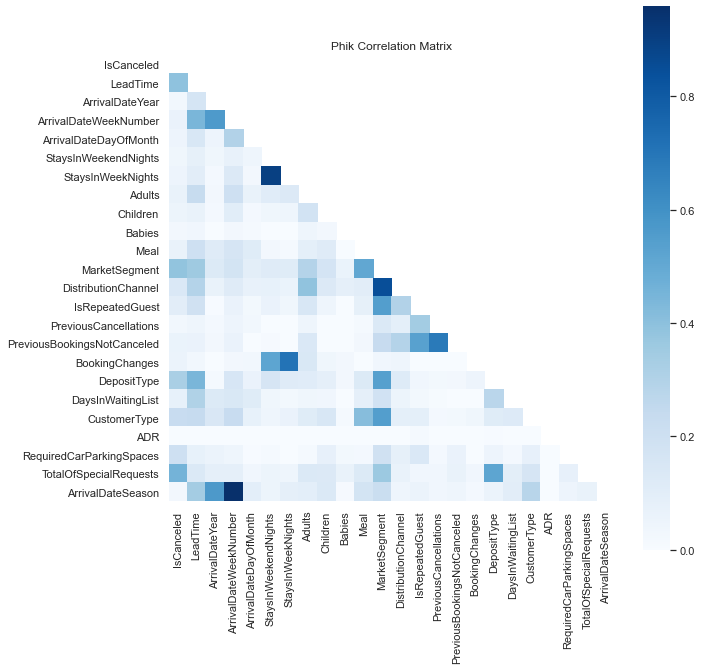

In [43]:
heatmap_phik(df.phik_matrix().abs())

<div class="alert alert-block alert-info">

### Data Imputation
    
</div>

In [44]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ArrivalDateSeason              0
dtype: int64

In [45]:
imputer = KNNImputer(n_neighbors=4)
metric_features = df.columns.to_list()
df[numerical] = imputer.fit_transform(df[numerical])

In [46]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ArrivalDateSeason              0
dtype: int64

## Outliers

#### Isolation Forest

In [47]:
data_central = df.copy()

In [48]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[numerical])

In [49]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [50]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.001 %


#### Minimum Covariance Determinant

In [51]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(data_central[numerical])

In [52]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [53]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.864 %


#### PCA Visualization of outliers

In [150]:
df_pca = df.copy()

In [151]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat  # What is this output?

array([[-9.69016129e+01, -1.11713905e+02, -2.42087610e+00, ...,
        -9.64084765e-03, -1.55475996e-02, -3.06741108e-03],
       [-1.99835369e+01, -3.01368448e+01, -3.35479861e+00, ...,
         1.71974639e-01, -3.15044631e-02, -9.99064996e-03],
       [-4.23802324e+01, -4.00930411e+01, -2.76598199e+00, ...,
         2.95985723e-01, -2.68498291e-02, -8.38455874e-03],
       ...,
       [-7.88253890e+01,  4.77084591e+01,  8.56945634e-01, ...,
         2.79163148e-01, -5.74615215e-02, -2.55690970e-02],
       [-6.50774614e-01, -6.76528542e-01, -3.09683778e+00, ...,
        -7.35814273e-02,  1.18377530e-02,  3.72758709e-03],
       [ 9.21081918e+01,  5.21586982e+01, -5.29351109e+00, ...,
         2.32952827e-01, -8.41167921e-03, -8.48442294e-03]])

In [152]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue    Difference    Proportion  Cumulative
1   12370.807508      0.000000  8.297023e-01    0.829702
2    1860.263325 -10510.544183  1.247667e-01    0.954469
3     418.948423  -1441.314902  2.809861e-02    0.982568
4     176.789502   -242.158921  1.185716e-02    0.994425
5      75.599803   -101.189698  5.070431e-03    0.999495
6       2.877591    -72.722212  1.929982e-04    0.999688
7       2.161458     -0.716132  1.449677e-04    0.999833
8       0.729202     -1.432256  4.890712e-05    0.999882
9       0.589575     -0.139627  3.954243e-05    0.999922
10      0.374184     -0.215391  2.509630e-05    0.999947
11      0.300744     -0.073441  2.017069e-05    0.999967
12      0.218753     -0.081990  1.467165e-05    0.999982
13      0.125596     -0.093157  8.423677e-06    0.999990
14      0.119708     -0.005888  8.028757e-06    0.999998
15      0.023422     -0.096286  1.570916e-06    1.000000
16      0.007036     -0.016386  4.718916e-07    1.000000

In [153]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0         PC1
0     -96.901613 -111.713905
1     -19.983537  -30.136845
2     -42.380232  -40.093041
3     -15.996137  -29.876333
4      -8.017631  -29.366896
...          ...         ...
79325 -85.886271  -14.432178
79326 -15.309648  119.617044
79327 -78.825389   47.708459
79328  -0.650775   -0.676529
79329  92.108192   52.158698

[79330 rows x 2 columns]

In [154]:
outliers = list(outliers_mcd.index.tolist() + outliers_if.index.tolist())

def is_out(x):
    if x in outliers:
        return 'Outlier'
    else:
        return 'Not Outlier'

pca_df['OUTLIER'] = pca_df.reset_index().iloc[:,0].apply(is_out)

In [155]:
pca_df.describe(include='all')

PC0           PC1      OUTLIER
count   7.933000e+04  7.933000e+04        79330
unique           NaN           NaN            2
top              NaN           NaN  Not Outlier
freq             NaN           NaN        77043
mean   -3.668704e-16  2.934963e-15          NaN
std     1.112241e+02  4.313077e+01          NaN
min    -4.107086e+02 -1.124371e+02          NaN
25%    -8.722383e+01 -2.630833e+01          NaN
50%    -3.581035e+01 -4.708927e+00          NaN
75%     5.327027e+01  2.060557e+01          NaN
max     5.204156e+02  5.276850e+03          NaN

Text(0, 0.5, 'Dim 2 (12.5%)')

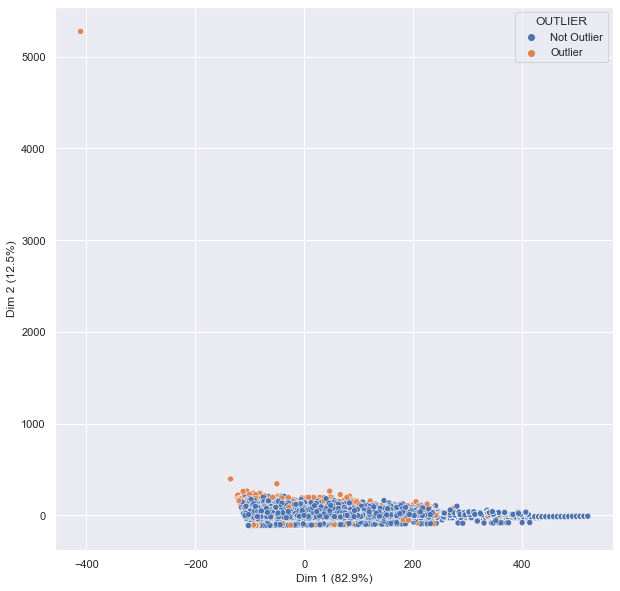

In [156]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue='OUTLIER')
plt.xlabel('Dim 1 (82.9%)')
plt.ylabel('Dim 2 (12.5%)')

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Catboost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [54]:
df[categorical]

Meal  MarketSegment DistributionChannel      DepositType  \
0      HB         Offline TA/TO               TA/TO  No Deposit        
1      BB             Online TA               TA/TO  No Deposit        
2      BB             Online TA               TA/TO  No Deposit        
3      BB             Online TA               TA/TO  No Deposit        
4      BB             Online TA               TA/TO  No Deposit        
...          ...            ...                 ...              ...   
79325  BB         Offline TA/TO               TA/TO  No Deposit        
79326  BB             Online TA               TA/TO  No Deposit        
79327  BB             Online TA               TA/TO  No Deposit        
79328  BB             Online TA               TA/TO  No Deposit        
79329  HB             Online TA               TA/TO  No Deposit        

      CustomerType ArrivalDateSeason  
0        Transient            Summer  
1        Transient            Summer  
2        Transient            Summer  
3        Transient            Summer  
4        Transient            Summer  
...            ...               ...  
79325    Transient            Summer  
79326    Transient            Summer  
79327    Transient            Summer  
79328    Transient            Summer  
79329    Transient            Summer  

[79330 rows x 6 columns]

In [55]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

### Separating X and Y

In [56]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [58]:
cat = CatBoostClassifier(iterations=100,cat_features=categorical)
cat.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4846051	total: 115ms	remaining: 11.3s
1:	learn: 0.4486189	total: 162ms	remaining: 7.95s
2:	learn: 0.4276851	total: 219ms	remaining: 7.07s
3:	learn: 0.4025065	total: 265ms	remaining: 6.36s
4:	learn: 0.3951792	total: 310ms	remaining: 5.89s
5:	learn: 0.3918092	total: 352ms	remaining: 5.52s
6:	learn: 0.3874945	total: 402ms	remaining: 5.34s
7:	learn: 0.3829773	total: 453ms	remaining: 5.2s
8:	learn: 0.3816122	total: 504ms	remaining: 5.09s
9:	learn: 0.3777768	total: 557ms	remaining: 5.01s
10:	learn: 0.3761815	total: 602ms	remaining: 4.87s
11:	learn: 0.3740143	total: 647ms	remaining: 4.75s
12:	learn: 0.3720872	total: 699ms	remaining: 4.67s
13:	learn: 0.3710684	total: 746ms	remaining: 4.58s
14:	learn: 0.3704349	total: 788ms	remaining: 4.47s
15:	learn: 0.3699462	total: 845ms	remaining: 4.43s
16:	learn: 0.3690762	total: 896ms	remaining: 4.37s
17:	learn: 0.3681871	total: 947ms	remaining: 4.31s
18:	learn: 0.3670712	total: 991ms	remaining: 4.23s
19:	learn: 0.3660

### Feature Selection

In [59]:
importances = cat.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

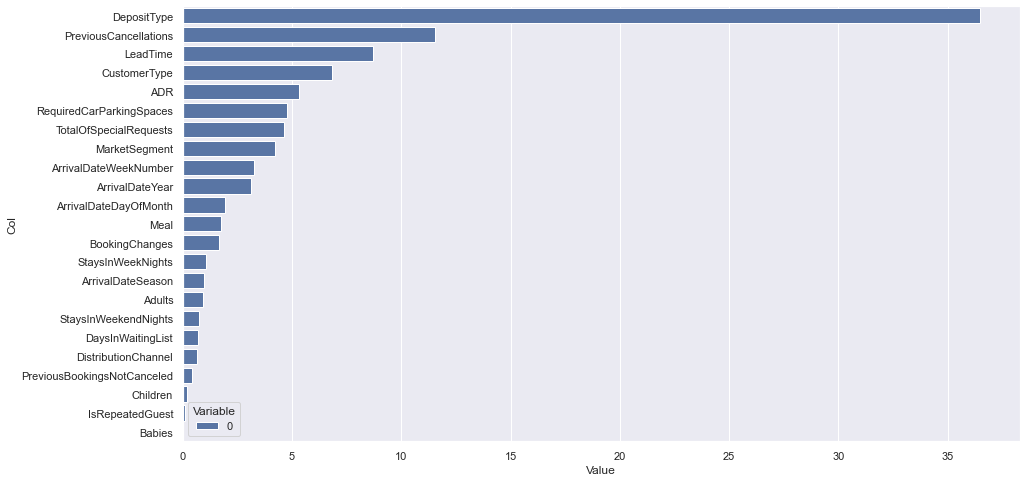

In [60]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [61]:
X.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

In [62]:
X_cat=X.loc[:,['DepositType','PreviousCancellations','LeadTime','CustomerType','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','MarketSegment','ArrivalDateWeekNumber','ArrivalDateYear','ArrivalDateDayOfMonth','Meal','BookingChanges','StaysInWeekNights','ArrivalDateSeason','Adults']]

### Data Split after feature selection

In [63]:
categorical=X_cat.select_dtypes(include="object").columns.to_list()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [65]:
cat = CatBoostClassifier(iterations=300,cat_features=categorical,verbose=100)
cat.fit(X_train,y_train)

Learning rate set to 0.182849
0:	learn: 0.5608338	total: 75.9ms	remaining: 22.7s
100:	learn: 0.3461177	total: 6.24s	remaining: 12.3s
200:	learn: 0.3262937	total: 12.6s	remaining: 6.22s
299:	learn: 0.3128036	total: 19s	remaining: 0us


In [66]:
y_train_pred= cat.predict(X_train)
y_test_pred=cat.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     36982
           1       0.88      0.76      0.82     26482

    accuracy                           0.86     63464
   macro avg       0.86      0.85      0.85     63464
weighted avg       0.86      0.86      0.86     63464

[[34315  2667]
 [ 6250 20232]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

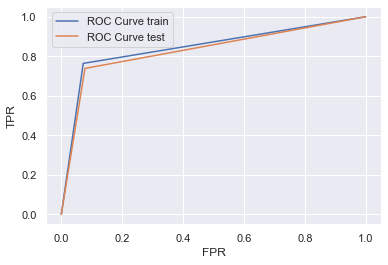

In [67]:
roc_curve_plot(cat,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [68]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [69]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [70]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>7 - Applying One Hot Encoder</font> <a class="anchor" id="seventh-bullet"></a>
    
</div>

In [71]:
df[categorical]

DepositType CustomerType  MarketSegment       Meal  \
0      No Deposit         Transient  Offline TA/TO  HB          
1      No Deposit         Transient      Online TA  BB          
2      No Deposit         Transient      Online TA  BB          
3      No Deposit         Transient      Online TA  BB          
4      No Deposit         Transient      Online TA  BB          
...                ...          ...            ...        ...   
79325  No Deposit         Transient  Offline TA/TO  BB          
79326  No Deposit         Transient      Online TA  BB          
79327  No Deposit         Transient      Online TA  BB          
79328  No Deposit         Transient      Online TA  BB          
79329  No Deposit         Transient      Online TA  HB          

      ArrivalDateSeason  
0                Summer  
1                Summer  
2                Summer  
3                Summer  
4                Summer  
...                 ...  
79325            Summer  
79326            Summer  
79327            Summer  
79328            Summer  
79329            Summer  

[79330 rows x 5 columns]

### Separating X and Y

In [72]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

### One Hot Encoder

In [73]:
df_ohc = X.copy()
categorical=X.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
X=df_ohc.copy()
X.head()

Meal_BB         Meal_FB         Meal_HB         Meal_SC         \
0             0.0             0.0             1.0             0.0   
1             1.0             0.0             0.0             0.0   
2             1.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   MarketSegment_Aviation  MarketSegment_Complementary  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     0.0                          0.0   
3                     0.0                          0.0   
4                     0.0                          0.0   

   MarketSegment_Corporate  MarketSegment_Direct  MarketSegment_Groups  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   

   MarketSegment_Offline TA/TO  ...  Children  Babies  IsRepeatedGuest  \
0                          1.0  ...       0.0     0.0                0   
1                          0.0  ...       0.0     0.0                0   
2                          0.0  ...       0.0     0.0                0   
3                          0.0  ...       0.0     0.0                0   
4                          0.0  ...       0.0     0.0                0   

   PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                    0.0                          0.0             0.0   
1                    0.0                          0.0             0.0   
2                    0.0                          0.0             0.0   
3                    0.0                          0.0             0.0   
4                    0.0                          0.0             0.0   

   DaysInWaitingList   ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  
0                0.0   0.0                       0.0                     0.0  
1                0.0  76.5                       0.0                     1.0  
2                0.0  68.0                       0.0                     1.0  
3                0.0  76.5                       0.0                     2.0  
4                0.0  76.5                       0.0                     1.0  

[5 rows x 45 columns]

In [74]:
X.columns

Index(['Meal_BB       ', 'Meal_FB       ', 'Meal_HB       ', 'Meal_SC       ',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'DistributionChannel_Undefined', 'DepositType_No Deposit     ',
       'DepositType_Non Refund     ', 'DepositType_Refundable     ',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party', 'ArrivalDateSeason_Autumn',
       'ArrivalDateSeason_Spring', 'ArrivalDateSeason_Summer',
       'ArrivalDateSeason_Winter', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Childre

In [75]:
X.drop(['Meal_HB       ','MarketSegment_Undefined','DepositType_Non Refund     ','DistributionChannel_Undefined','CustomerType_Group','ArrivalDateSeason_Winter'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Gradient Boost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### 8.1 - Data Splitting

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [77]:
gb = GradientBoostingClassifier() 
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
best_scale(gb,X_train,y_train,X_test,y_test)

F1 Score
Standard   0.817597
MinMax     0.810538
MaxAbs     0.810538
Robust     0.818102
No Scaler  0.818165

### Feature Selection

In [79]:
importances = gb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

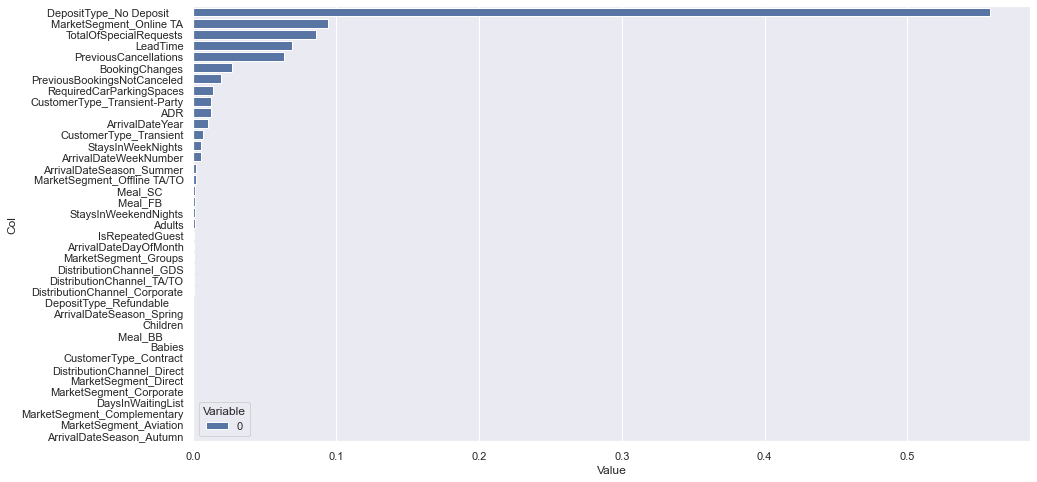

In [80]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [81]:
X.columns

Index(['Meal_BB       ', 'Meal_FB       ', 'Meal_SC       ',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Corporate',
       'DistributionChannel_Direct', 'DistributionChannel_GDS',
       'DistributionChannel_TA/TO', 'DepositType_No Deposit     ',
       'DepositType_Refundable     ', 'CustomerType_Contract',
       'CustomerType_Transient', 'CustomerType_Transient-Party',
       'ArrivalDateSeason_Autumn', 'ArrivalDateSeason_Spring',
       'ArrivalDateSeason_Summer', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParki

In [82]:
X_gb=X.loc[:,["DepositType_No Deposit     ", 'MarketSegment_Online TA','TotalOfSpecialRequests','LeadTime','PreviousCancellations','BookingChanges','PreviousBookingsNotCanceled','RequiredCarParkingSpaces','ADR','CustomerType_Transient-Party','StaysInWeekNights','ArrivalDateWeekNumber','ArrivalDateSeason_Summer']]

In [83]:
X_gb

DepositType_No Deposit       MarketSegment_Online TA  \
0                              1.0                      0.0   
1                              1.0                      1.0   
2                              1.0                      1.0   
3                              1.0                      1.0   
4                              1.0                      1.0   
...                            ...                      ...   
79325                          1.0                      0.0   
79326                          1.0                      1.0   
79327                          1.0                      1.0   
79328                          1.0                      1.0   
79329                          1.0                      1.0   

       TotalOfSpecialRequests  LeadTime  PreviousCancellations  \
0                         0.0       6.0                    0.0   
1                         1.0      88.0                    0.0   
2                         1.0      65.0                    0.0   
3                         2.0      92.0                    0.0   
4                         1.0     100.0                    0.0   
...                       ...       ...                    ...   
79325                     0.0      23.0                    0.0   
79326                     2.0     102.0                    0.0   
79327                     4.0      34.0                    0.0   
79328                     0.0     109.0                    0.0   
79329                     2.0     205.0                    0.0   

       BookingChanges  PreviousBookingsNotCanceled  RequiredCarParkingSpaces  \
0                 0.0                          0.0                       0.0   
1                 0.0                          0.0                       0.0   
2                 0.0                          0.0                       0.0   
3                 0.0                          0.0                       0.0   
4                 0.0                          0.0                       0.0   
...               ...                          ...                       ...   
79325             0.0                          0.0                       0.0   
79326             0.0                          0.0                       0.0   
79327             0.0                          0.0                       0.0   
79328             0.0                          0.0                       0.0   
79329             0.0                          0.0                       0.0   

          ADR  CustomerType_Transient-Party  StaysInWeekNights  \
0        0.00                           0.0                2.0   
1       76.50                           0.0                4.0   
2       68.00                           0.0                4.0   
3       76.50                           0.0                4.0   
4       76.50                           0.0                2.0   
...       ...                           ...                ...   
79325   96.14                           0.0                5.0   
79326  225.43                           0.0                5.0   
79327  157.71                           0.0                5.0   
79328  104.40                           0.0                5.0   
79329  151.20                           0.0                7.0   

       ArrivalDateWeekNumber  ArrivalDateSeason_Summer  
0                       27.0                       1.0  
1                       27.0                       1.0  
2                       27.0                       1.0  
3                       27.0                       1.0  
4                       27.0                       1.0  
...                      ...                       ...  
79325                   35.0                       1.0  
79326                   35.0                       1.0  
79327                   35.0                       1.0  
79328                   35.0                       1.0  
79329                   35.0                       1.0  

[79330 rows x 13 c

###  Data Split after feature selection


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_gb, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [85]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=10,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features=10, min_samples_leaf=9,
                           random_state=70)

In [86]:
y_train_pred= gb.predict(X_train)
y_test_pred=gb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     36982
           1       0.87      0.69      0.77     26482

    accuracy                           0.83     63464
   macro avg       0.84      0.81      0.82     63464
weighted avg       0.83      0.83      0.83     63464

[[34235  2747]
 [ 8085 18397]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

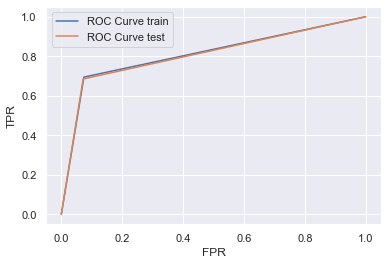

In [87]:
roc_curve_plot(gb,X_train,X_test,y_test,y_train)

### Cross-Validation

In [88]:
#cv_results = cross_validate(gb, X_train,y_train, cv=5, scoring=["accuracy"])
#gb_cross_f1=cv_results["accuracy"].mean()
#gb_cross_f1

### Grid Search Cv

In [89]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [90]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [91]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>xGBoost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

In [93]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[15:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
best_scale(xgb,X_train,y_train,X_test,y_test)

[15:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

F1 Score
Standard   0.842809
MinMax     0.809467
MaxAbs     0.809467
Robust     0.845834
No Scaler  0.848418

### Feature Selection

In [95]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

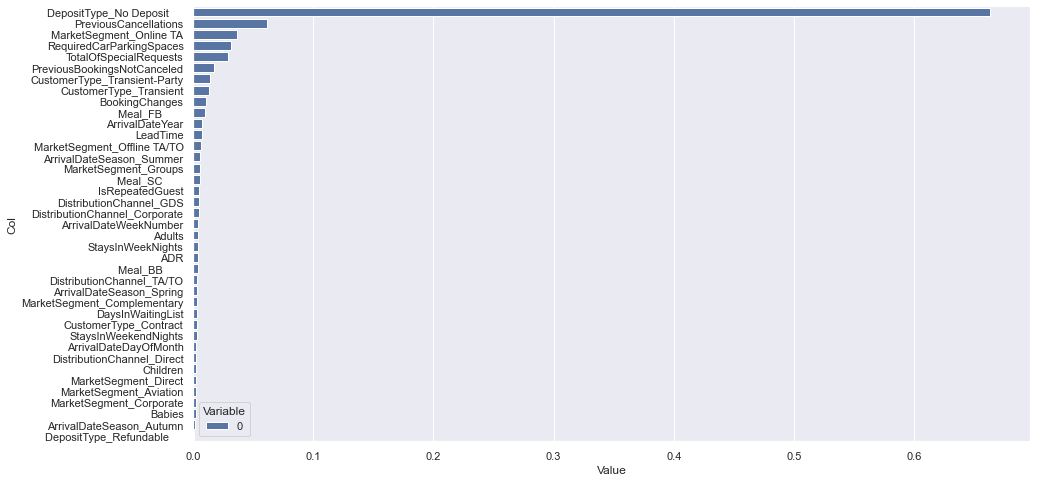

In [96]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [97]:
zippy.sort_values(by=0,ascending=False)

0                            col
14  0.663322    DepositType_No Deposit     
32  0.061796          PreviousCancellations
9   0.036481        MarketSegment_Online TA
37  0.031915       RequiredCarParkingSpaces
38  0.029039         TotalOfSpecialRequests
33  0.017330    PreviousBookingsNotCanceled
18  0.014232   CustomerType_Transient-Party
17  0.013142         CustomerType_Transient
34  0.010480                 BookingChanges
1   0.009870                 Meal_FB       
23  0.007502                ArrivalDateYear
22  0.007366                       LeadTime
8   0.006596    MarketSegment_Offline TA/TO
21  0.005944       ArrivalDateSeason_Summer
7   0.005923           MarketSegment_Groups
2   0.005631                 Meal_SC       
31  0.005031                IsRepeatedGuest
12  0.004608        DistributionChannel_GDS
10  0.004591  DistributionChannel_Corporate
24  0.004223          ArrivalDateWeekNumber
28  0.004107                         Adults
27  0.004018              StaysInWeekNights
36  0.003926                            ADR
0   0.003776                 Meal_BB       
13  0.003438      DistributionChannel_TA/TO
20  0.003126       ArrivalDateSeason_Spring
4   0.003080    MarketSegment_Complementary
35  0.002895              DaysInWaitingList
16  0.002883          CustomerType_Contract
26  0.002865           StaysInWeekendNights
25  0.002783          ArrivalDateDayOfMonth
11  0.002764     DistributionChannel_Direct
29  0.002694                       Children
6   0.002685           MarketSegment_Direct
3   0.002617         MarketSegment_Aviation
5   0.002383        MarketSegment_Corporate
30  0.002240                         Babies
19  0.001709       ArrivalDateSeason_Autumn
15  0.000992    DepositType_Refundable

In [98]:
X_xgb=X[zippy.sort_values(by=0,ascending=False).head(15)['col']]

In [99]:
X_xgb.columns

Index(['DepositType_No Deposit     ', 'PreviousCancellations',
       'MarketSegment_Online TA', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'PreviousBookingsNotCanceled',
       'CustomerType_Transient-Party', 'CustomerType_Transient',
       'BookingChanges', 'Meal_FB       ', 'ArrivalDateYear', 'LeadTime',
       'MarketSegment_Offline TA/TO', 'ArrivalDateSeason_Summer',
       'MarketSegment_Groups'],
      dtype='object')

#### Data Split after Feature Selection

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y, train_size=0.8, random_state=42)

In [101]:
xgb = XGBClassifier(max_depth=5, min_samples_leaf=8)
xgb.fit(X_train,y_train)

[15:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     36957
           1       0.86      0.72      0.78     26507

    accuracy                           0.83     63464
   macro avg       0.84      0.82      0.82     63464
weighted avg       0.84      0.83      0.83     63464

[[33792  3165]
 [ 7405 19102]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### Grid Search

In [103]:
max_depth_range=[5,6,7]
min_samples_leaf_range=[8,9,10,11]
max_features_range=[12,15,17]
n_estimators_range=[100,300,500]
random_state_range=[20,35,70]
param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=xgb,param_grid=param_grid, cv =5)

In [104]:
#grid.fit(X_train,y_train)
#grid.best_params_

In [105]:
xgb = XGBClassifier(max_depth=7, min_samples_leaf=8)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

[15:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
--------------------------------------------------------------------------------

##### ROC curve

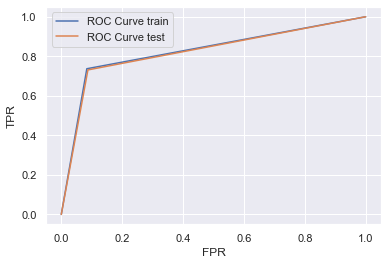

In [106]:
roc_curve_plot(xgb,X_train,X_test,y_test,y_train)

## Visualization